In [ ]:
"""Edyta Bartoś i Marcin Grelewicz, 

usage of red and white data from: 
https://machinelearningmastery.com/standard-machine-learning-datasets/, 
for building the classifier SVM-> Support Vector Machine, which is commonly 
used for supervised learning to analyze data and recognize patterns, by dividing
data on hyperplane with maximum margin possible. 

Two datasets have 12 atribute informations, icluding quality, which is our reference. 
More info about atributes of wine here: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
We select the most important attributes of wine to simplify calculations by using pearson correlation. 
Our goal is to classify wine for 2 quality categories- good or bad.

"""

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #wykresy
import seaborn as sns #wizualizacje
from sklearn.preprocessing import MinMaxScaler #skalowanie przed dzieleniem danych na treningowe i testowe
#from sklearn.decomposition import PCA
from sklearn import svm
#from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.preprocessing import label_binarize

In [2]:
#reading data
red_wines = pd.read_csv("winequality-red.csv",sep=';')
white_wines = pd.read_csv("winequality-white.csv",sep=';')

red_wines.info()
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [3]:
white_wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
red_wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

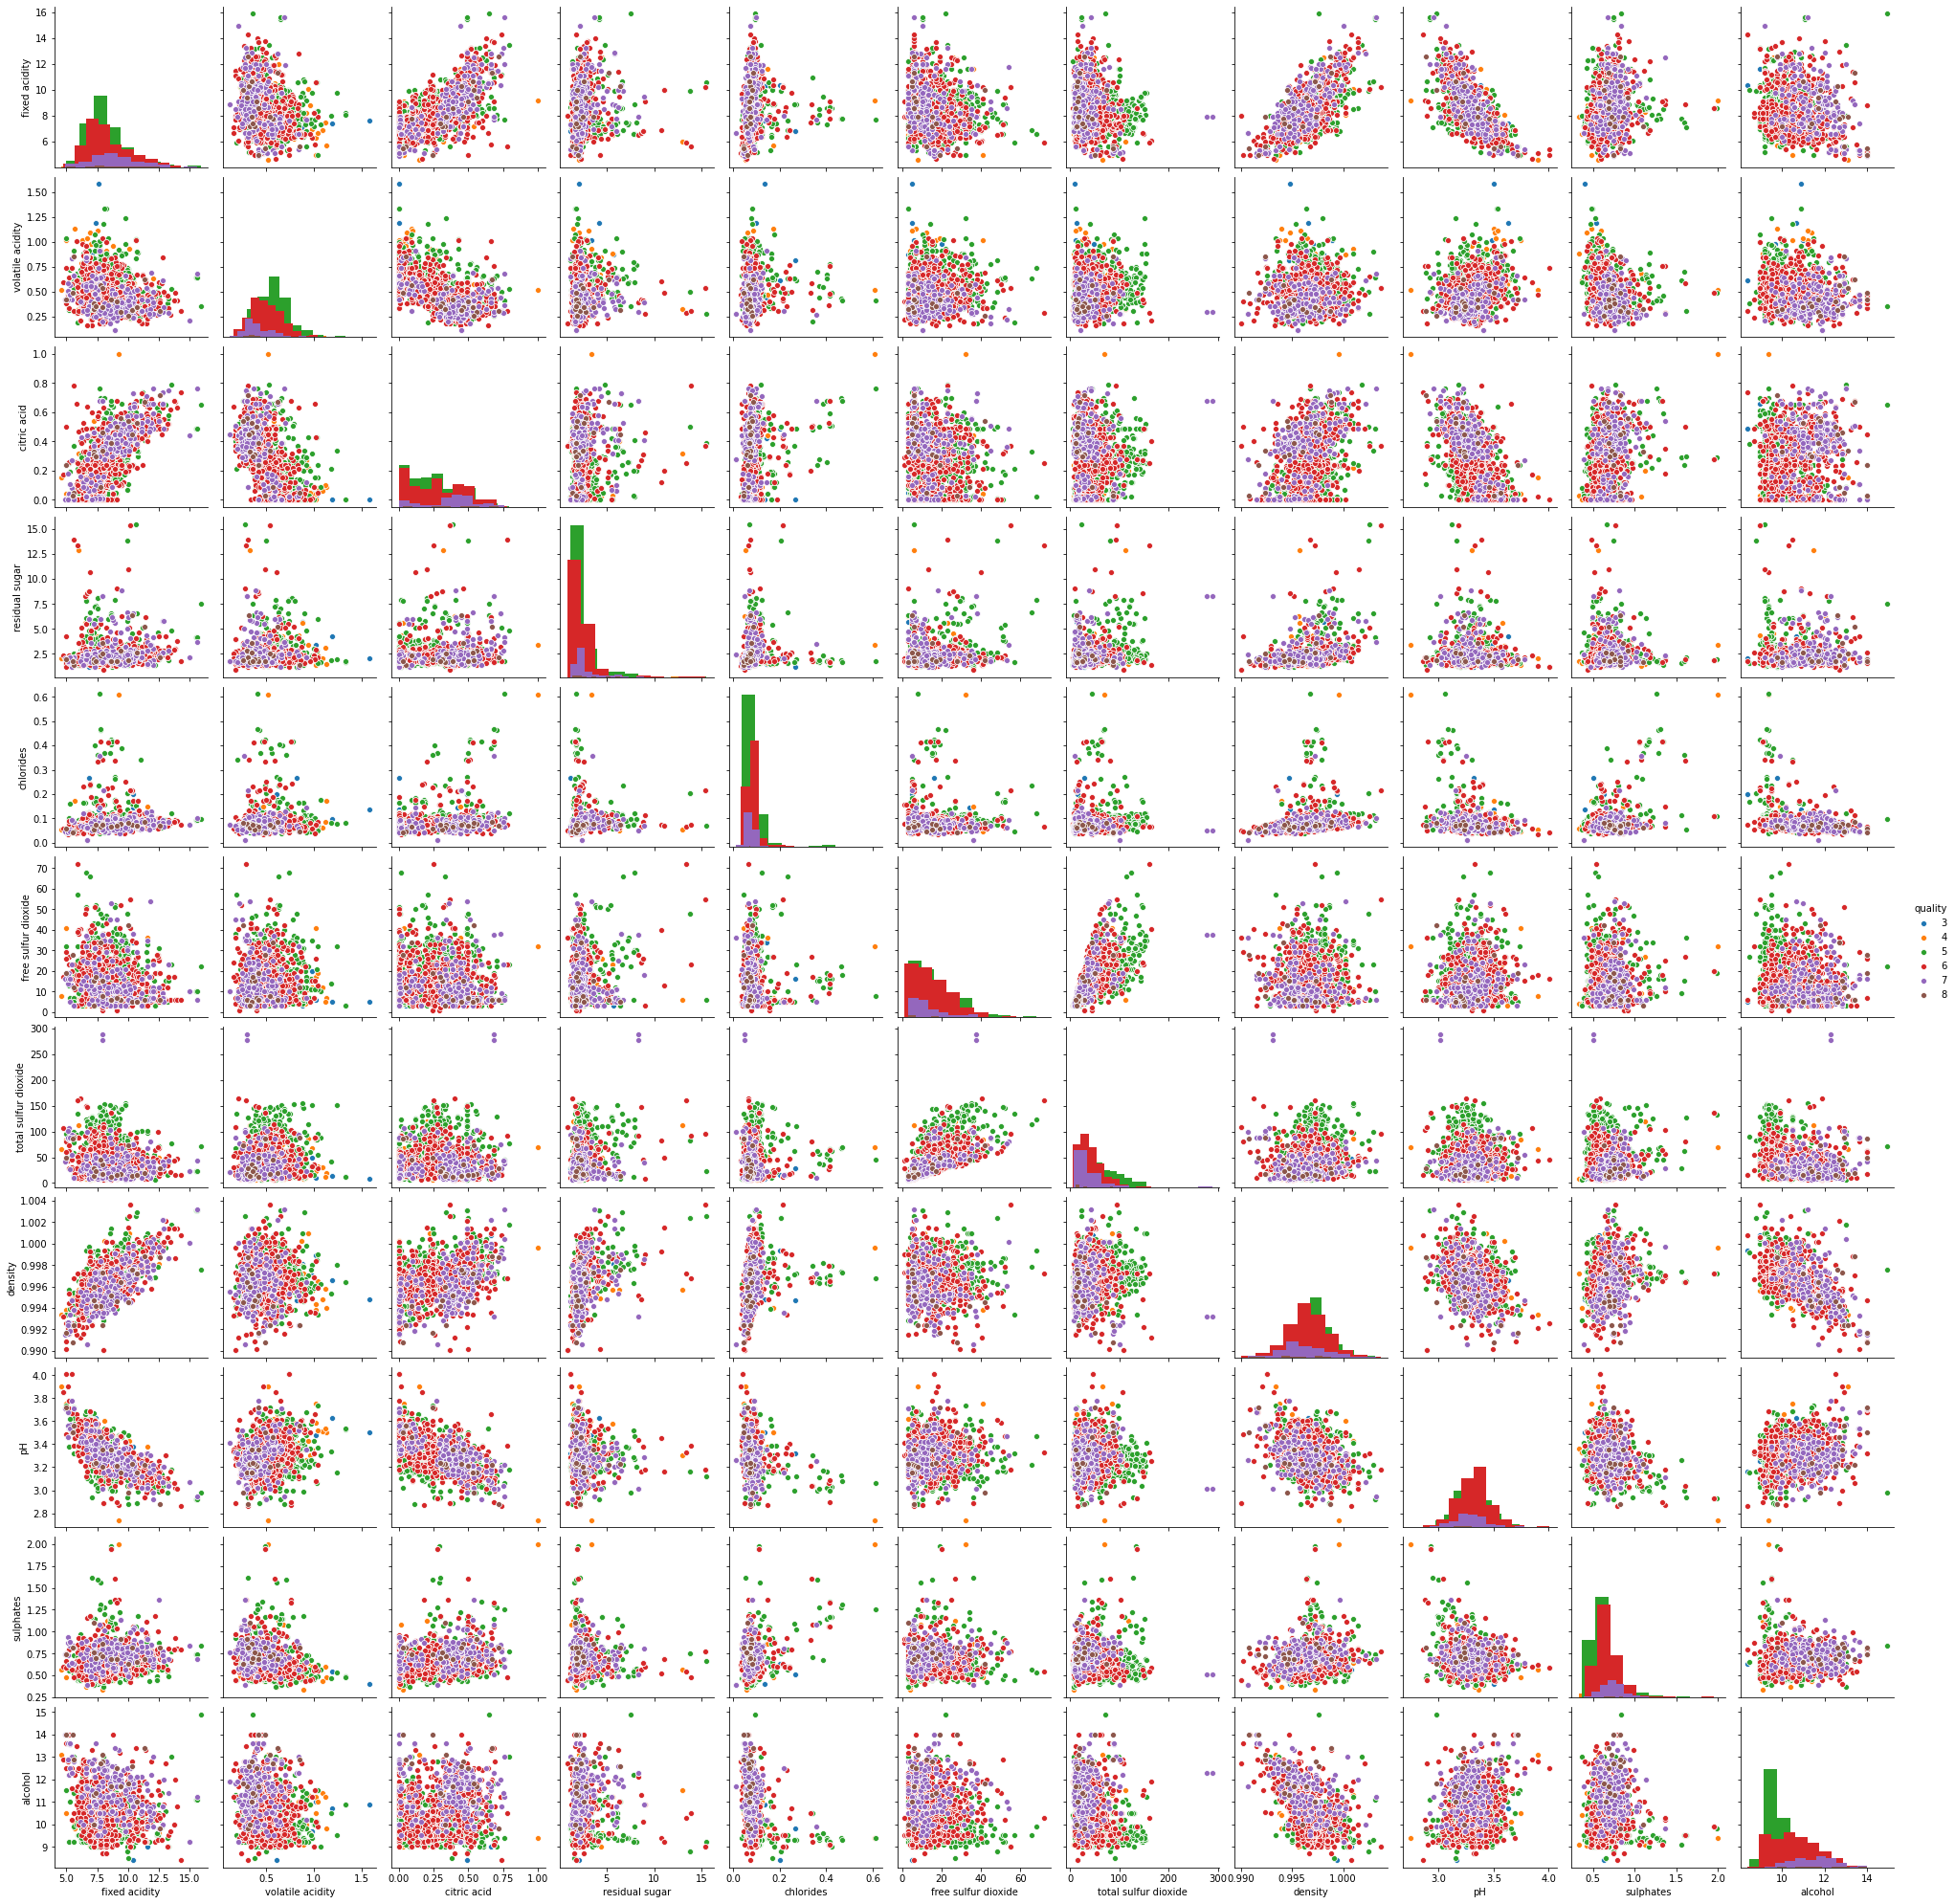

In [5]:
hist = sns.pairplot(red_wines, diag_kind='hist', hue='quality')

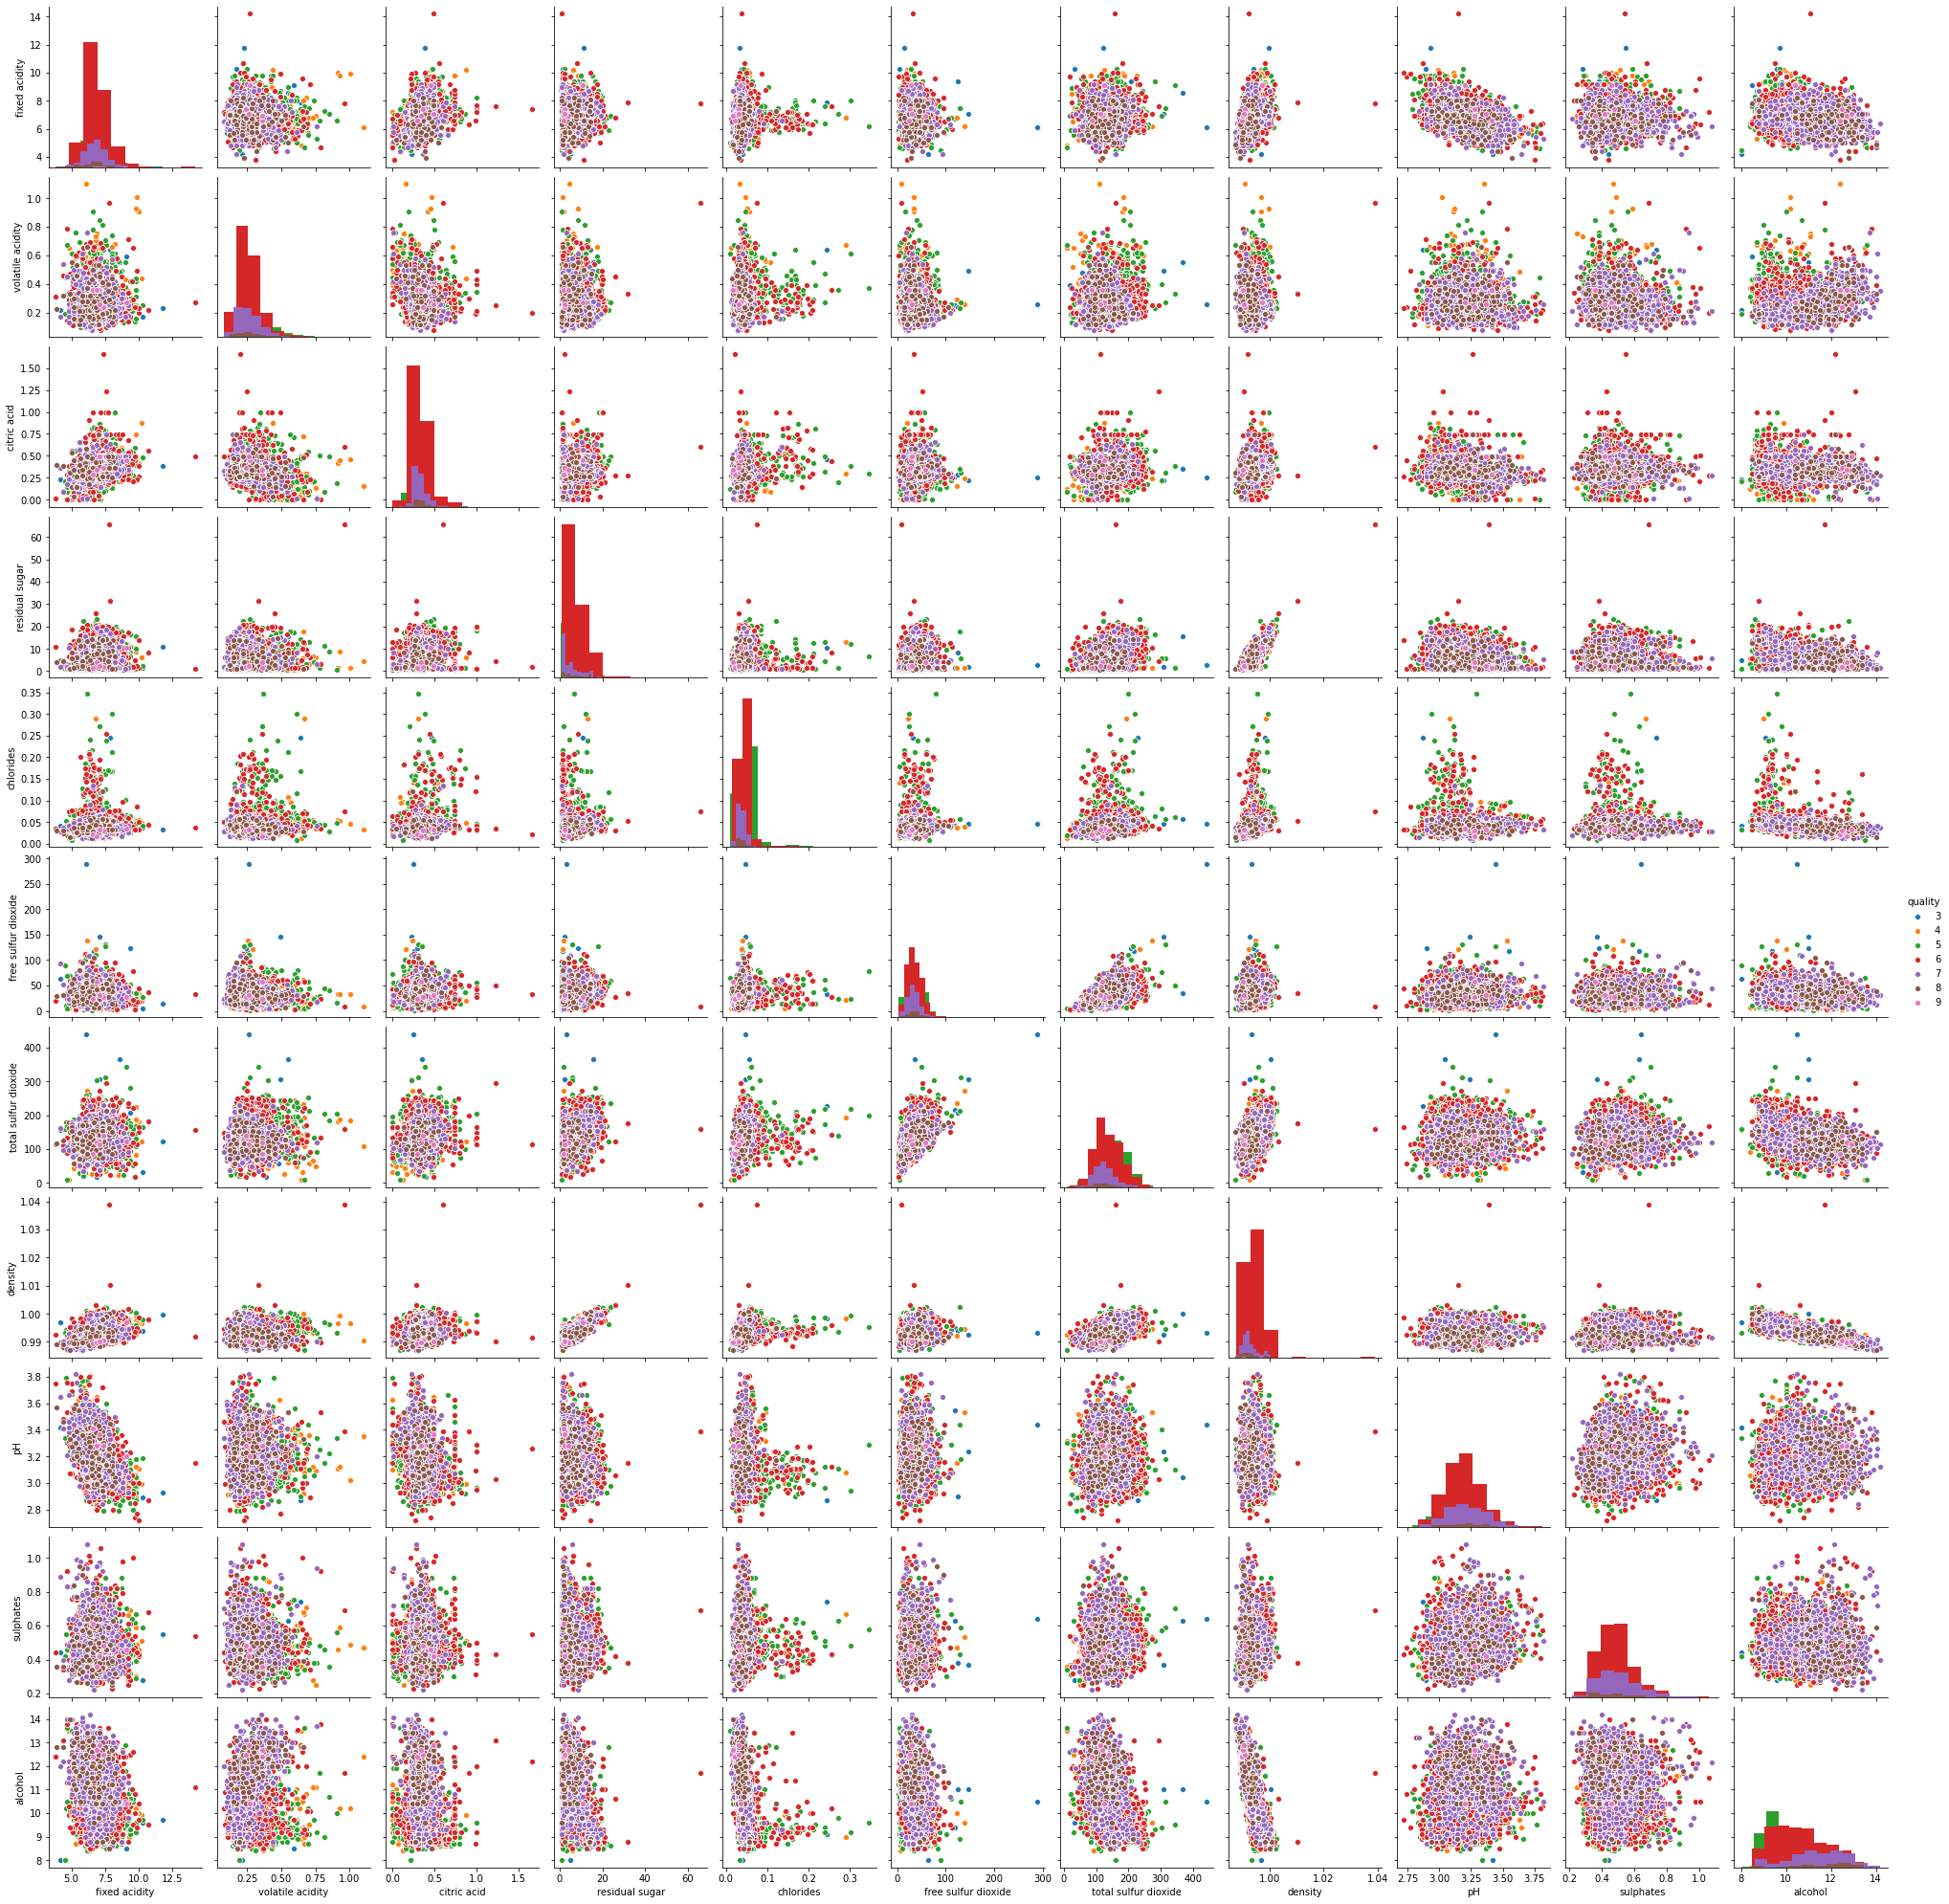

In [6]:
hist = sns.pairplot(white_wines, diag_kind='hist', hue='quality')

In [7]:
#check the scores of red wines
red_wines.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#check the scores of white wines
white_wines.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
#Divide data for 2 parts (X- atributes, Y- quality)

X_red = red_wines.iloc[1:, :-1]
y_red = red_wines.iloc[1:, -1]

X_white = white_wines.iloc[1:, :-1]
y_white = white_wines.iloc[1:, -1]

top correlations:  Index(['sulphates', 'volatile acidity', 'alcohol'], dtype='object')


[(-1.0, 1.0), Text(0, 0.5, 'Pearson correlation')]

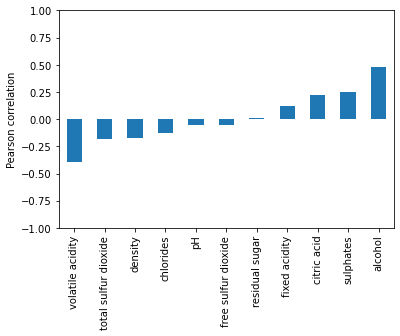

In [10]:
## Pearson pairwise correlation to show which features are most correlated (red wines):
red_correlations = X_red.corrwith(y_red)
red_correlations.sort_values(inplace=True)

red_fields = red_correlations.map(abs).sort_values().iloc[-3:].index
## print top absolute correlations:
print('top correlations: ', red_fields)

## Plot correlation bars:
ax_red = red_correlations.plot(kind='bar')
ax_red.set(ylim=[-1, 1], ylabel='Pearson correlation')

top correlations:  Index(['chlorides', 'density', 'alcohol'], dtype='object')


[(-1.0, 1.0), Text(0, 0.5, 'Pearson correlation')]

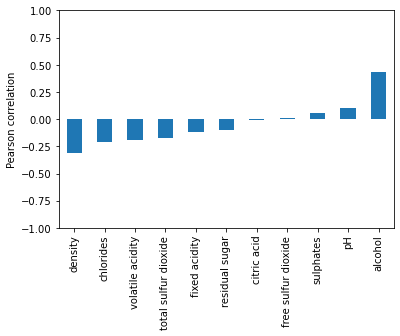

In [11]:
## Pearson pairwise correlation to show which features are most correlated (white wines):
white_correlations = X_white.corrwith(y_white)
white_correlations.sort_values(inplace=True)

white_fields = white_correlations.map(abs).sort_values().iloc[-3:].index
## print top absolute correlations:
print('top correlations: ', white_fields)

## Plot correlation bars:
ax_white = white_correlations.plot(kind='bar')
ax_white.set(ylim=[-1, 1], ylabel='Pearson correlation')

In [12]:
## Categorize wine quality:
bins = 2
group_names = ['bad', 'good']
categories_red = pd.cut(red_wines['quality'], bins, labels = group_names)
categories_white = pd.cut(white_wines['quality'], bins, labels = group_names)

red_wines['quality'] = categories_red
white_wines['quality'] = categories_white

In [13]:
white_wines['quality'].value_counts()

bad     3838
good    1060
Name: quality, dtype: int64

In [14]:
red_wines['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [15]:
## Encoding Quality column
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y_red = labelencoder_y.fit_transform(red_wines['quality'])
y_white = labelencoder_y.fit_transform(white_wines['quality'])

<AxesSubplot:ylabel='count'>

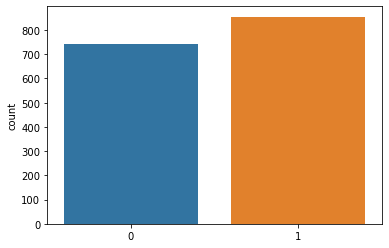

In [16]:
sns.countplot(y_red)

In [17]:
## Scale values (red wines):
scaler = MinMaxScaler()
X_red = scaler.fit_transform(red_wines[red_fields])
X_red = pd.DataFrame(X_red, columns=['%s_scaled' % field for field in red_fields])
y_red = pd.DataFrame(y_red, columns=['quality'])
y_red = np.ravel(y_red)

In [18]:
## Scale values (white wines):
X_white = scaler.fit_transform(white_wines[white_fields])
X_white = pd.DataFrame(X_white, columns=['%s_scaled' % field for field in white_fields])
y_white = pd.DataFrame(y_white, columns=['quality'])
y_white = np.ravel(y_white)

In [19]:
## Split data to train and test portions:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_red, y_red, test_size=0.2, random_state=10)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_white, y_white, test_size=0.2, random_state=10)

## check if train and test have the same size:
print(Xr_train.shape, yr_train.shape)
print(Xr_test.shape, yr_test.shape)
print(Xw_train.shape, yw_train.shape)
print(Xw_test.shape, yw_test.shape)

(1279, 3) (1279,)
(320, 3) (320,)
(3918, 3) (3918,)
(980, 3) (980,)


In [23]:
from sklearn.metrics import classification_report

svc_r = svm.SVC(kernel='rbf', gamma=20, C=100).fit(Xr_train, yr_train)
yr_pred = svc_r.predict(Xr_test)

print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       143
           1       0.77      0.75      0.76       177

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [24]:
svc_w = svm.SVC(kernel='rbf', gamma=50, C=10).fit(Xw_train, yw_train)
yw_pred = svc_w.predict(Xw_test)

print(classification_report(yw_test, yw_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       761
           1       0.62      0.23      0.33       219

    accuracy                           0.80       980
   macro avg       0.71      0.59      0.61       980
weighted avg       0.77      0.80      0.76       980



In [40]:
# =============================================================================
## (one-time run) GridSearchCV to tune hyperparameters for the SVM:
## Red wines:
parameters_r = {'kernel':('linear', 'rbf'), 'C':[.1, 1, 3, 4, 5, 6, 7, 8, 10], 'gamma':[.5, 1, 40, 50, 60, 70, 80, 100]}
svc_r = svm.SVC(gamma='scale')
gscv_r = GridSearchCV(svc_r, param_grid=parameters_r, cv=None)
gscv_r.fit(Xr_train, yr_train)

## printing the best parameters:
print(gscv_r.best_estimator_)
print(gscv_r.best_params_)

SVC(C=7, gamma=50)
{'C': 7, 'gamma': 50, 'kernel': 'rbf'}


In [42]:
## White wines:
parameters_w = {'kernel':('linear', 'rbf'), 'C':[.08, .1, .2, .3], 'gamma':[190, 200, 220]}
svc_w = svm.SVC(gamma='scale')
gscv_w = GridSearchCV(svc_w, param_grid=parameters_w, cv=None)
gscv_w.fit(Xw_train, yw_train)

##Printing the best parameters (white wines):
print(gscv_w.best_estimator_)
print(gscv_w.best_params_)
# =============================================================================

SVC(C=0.2, gamma=200)
{'C': 0.2, 'gamma': 200, 'kernel': 'rbf'}


In [43]:
## red wines
svc_r = svm.SVC(kernel='rbf', gamma=50, C=7)
svc_r.fit(Xr_train, yr_train)

yr_pred = svc_r.predict(Xr_test)

In [67]:
## white wines
#svc_w = svm.SVC(kernel='rbf', gamma=200, C=0.2)
svc_w = svm.SVC(kernel='rbf', gamma=1000, C=5000)
svc_w.fit(Xw_train, yw_train)

yw_pred = svc_w.predict(Xw_test)

In [68]:
## Creation of confusion matrix
rmetrics = list()
wmetrics = list()
cmr = dict()
cmw = dict()

## confusion matrix for red wines:
cmr = confusion_matrix(yr_test, yr_pred)
## confusion matrix for white wines:
cmw = confusion_matrix(yw_test, yw_pred)

Red wines metrics:
              Model
precision  0.741727
recall     0.740625
fscore     0.740995
accuracy   0.740625



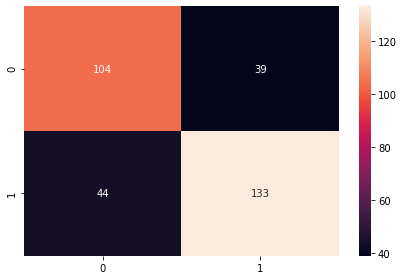

In [47]:
## red wines:

# Precision, recall, f-score from the multi-class support function
precision_r, recall_r, fscore_r, _ = score(yr_test, yr_pred, average='weighted')

# The usual way to calculate accuracy
accuracy_r = accuracy_score(yr_test, yr_pred)

rmetrics.append(pd.Series({'precision':precision_r, 'recall':recall_r, 
                          'fscore':fscore_r, 'accuracy':accuracy_r}, 
                         name='Model'))
rmetrics = pd.concat(rmetrics, axis=1)
print('Red wines metrics:')
print(rmetrics)
print()

#axList = ()
#axList = axList.flatten()
#fig.set_size_inches(15, 15)

#axList[-1].axis('off')

plot = sns.heatmap(cmr, annot=True, fmt='d');
plt.tight_layout()

White wines metrics:
              Model
precision  0.804786
recall     0.805102
fscore     0.804943
accuracy   0.805102



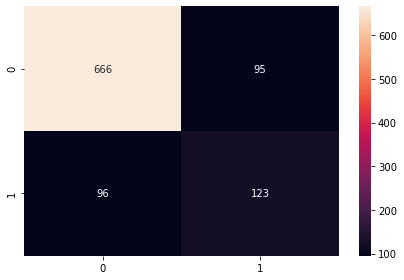

In [69]:
## white wines:

# Precision, recall, f-score from the multi-class support function
precision_w, recall_w, fscore_w, _ = score(yw_test, yw_pred, average='weighted')

# The usual way to calculate accuracy
accuracy_w = accuracy_score(yw_test, yw_pred)

wmetrics.append(pd.Series({'precision':precision_w, 'recall':recall_w, 
                          'fscore':fscore_w, 'accuracy':accuracy_w}, 
                         name='Model'))
wmetrics = pd.concat(wmetrics, axis=1)
print('White wines metrics:')
print(wmetrics)
print()

#axList = ()
#axList = axList.flatten()
#fig.set_size_inches(15, 15)

#axList[-1].axis('off')

plot = sns.heatmap(cmw, annot=True, fmt='d');
plt.tight_layout()